**Full name:** Lesedi Kopeledi Matshehla  
    
**Description of the Task:** Python-program that uses training data to choose the four ideal
functions which are the best fit out of the fifty provided (C) *. You get (A) 4 training datasets and
(B) one test dataset, as well as (C) datasets for 50 ideal functions. All data respectively consists of
x-y-pairs of values.

The first part of the program executed without errors.
The database created successfully.
Read CSV files and load them into Dataframes.

Train dataset
        x         y1         y2         y3        y4
0   -20.0  39.778572 -40.078590 -20.214268 -0.324914
1   -19.9  39.604813 -39.784000 -20.070950 -0.058820
2   -19.8  40.099070 -40.018845 -19.906782 -0.451830
3   -19.7  40.151100 -39.518402 -19.389118 -0.612044
4   -19.6  39.795662 -39.360065 -19.815890 -0.306076
..    ...        ...        ...        ...       ...
395  19.5 -38.254158  39.661987  19.536741  0.695158
396  19.6 -39.106945  39.067880  19.840752  0.638423
397  19.7 -38.926495  40.211475  19.516634  0.109105
398  19.8 -39.276672  40.038870  19.377943  0.189025
399  19.9 -39.724934  40.558865  19.630678  0.513824

[400 rows x 5 columns]

Ideal dataset
        x        y1        y2         y3        y4         y5        y6  \
0   -20.0 -0.912945  0.408082   9.087055  5.408082  -9.087055  0.912945   
1   -19.9 -0.867644  0.4

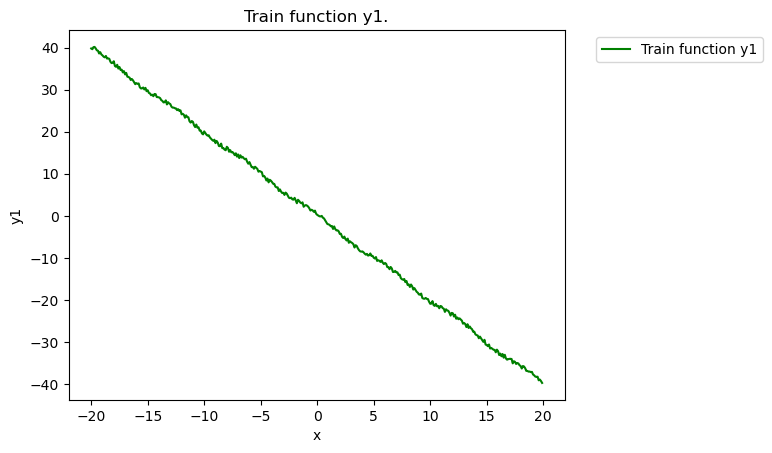

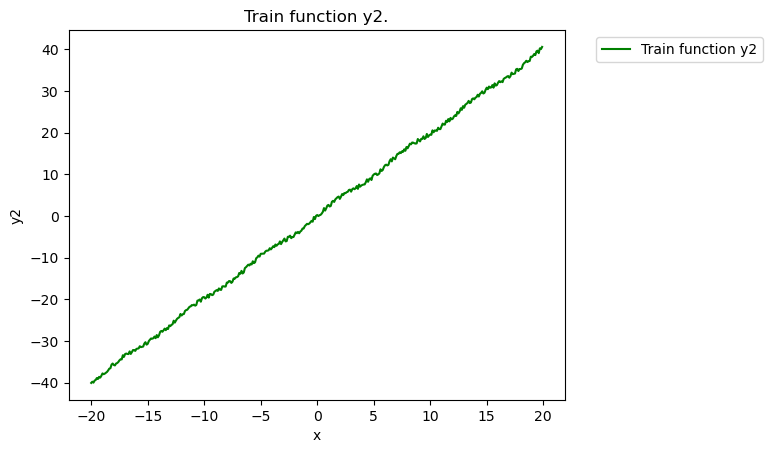

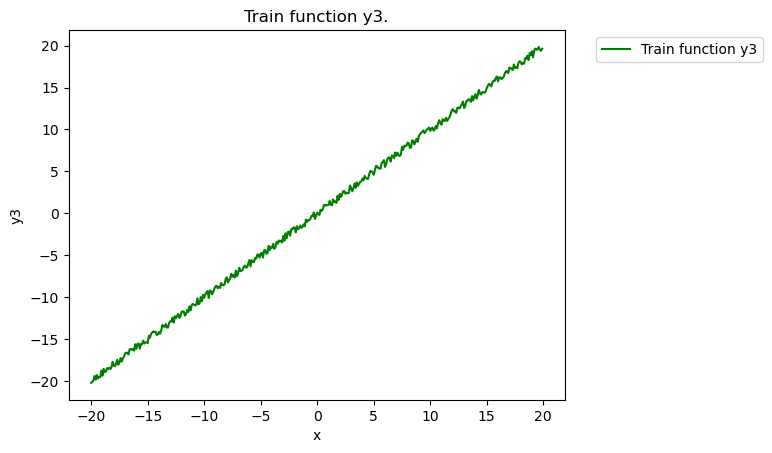

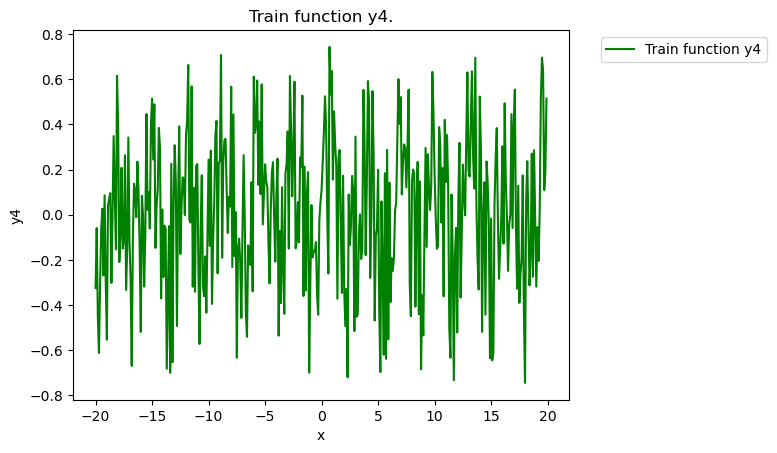


Ideal functions (4 chosen).


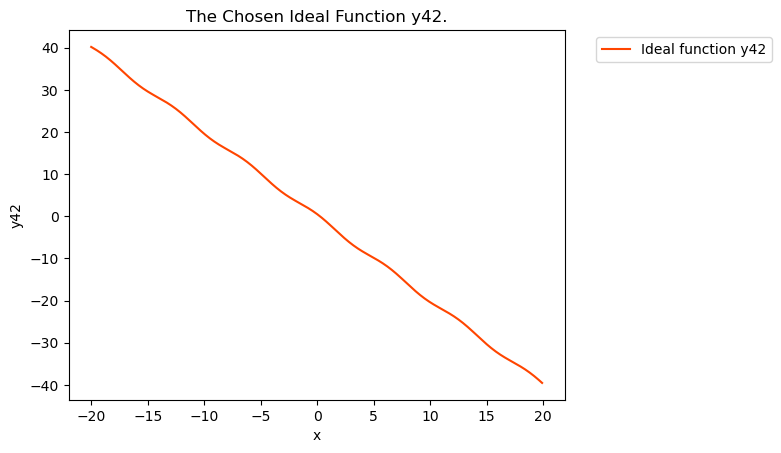

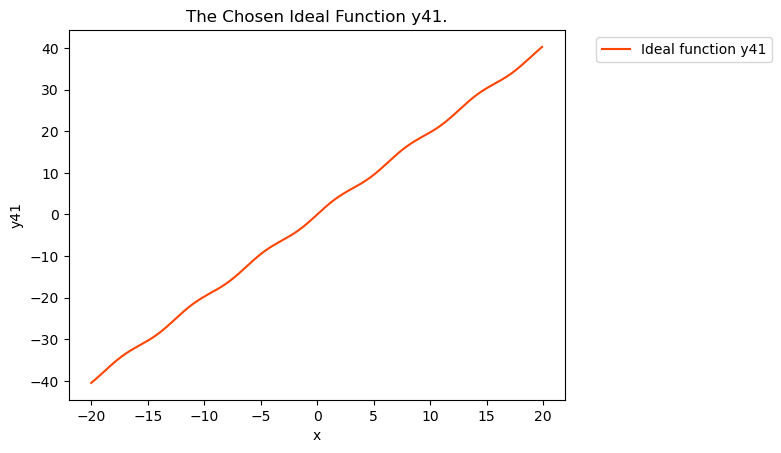

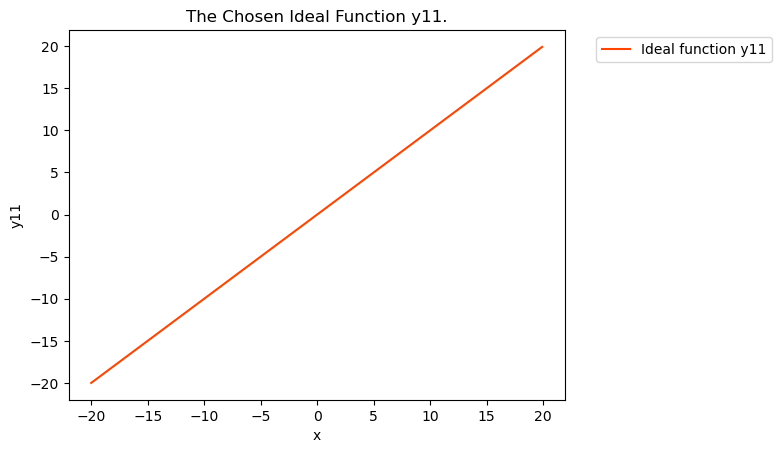

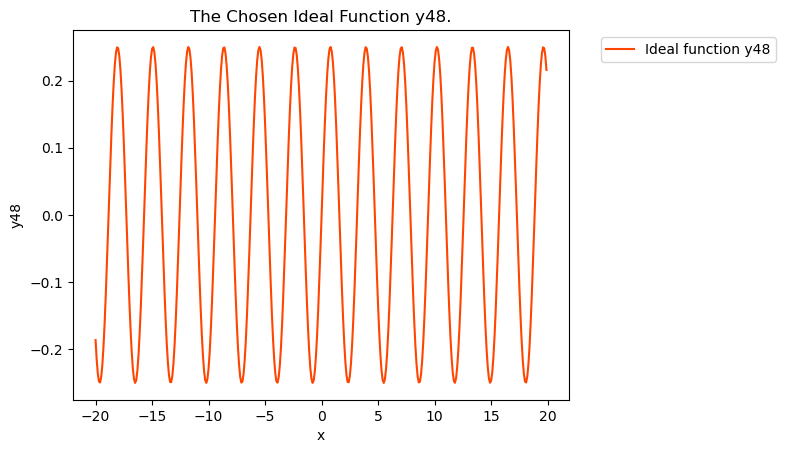


Test scatter (show points of test.csv).


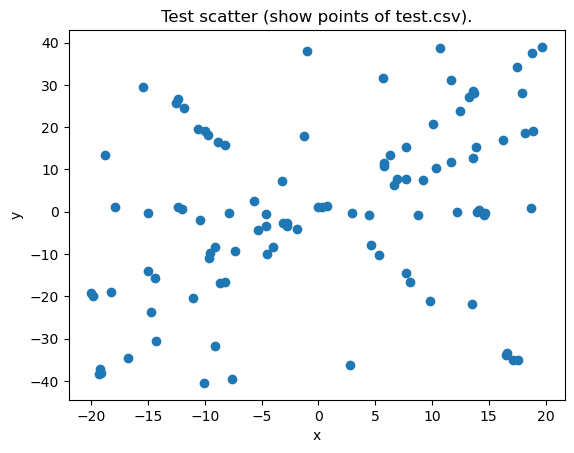


Create lists to visualize test_scat dataframe.

Append x and y values to the upper lists.

Plot ideal functions and test y-values on the same scatter plot.


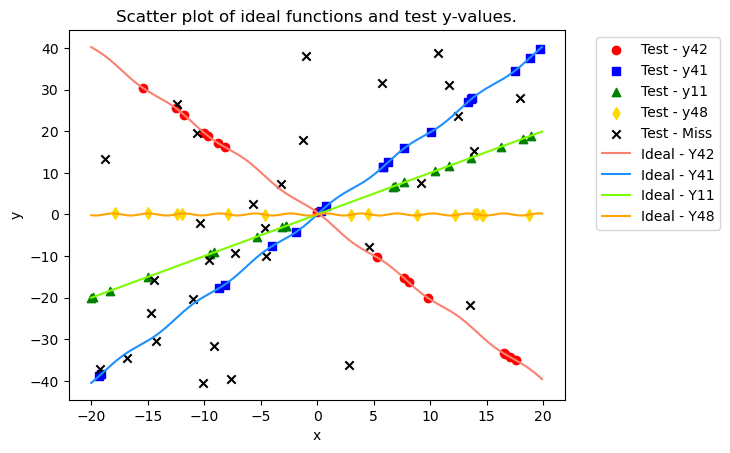


Ideal functions (all 50).


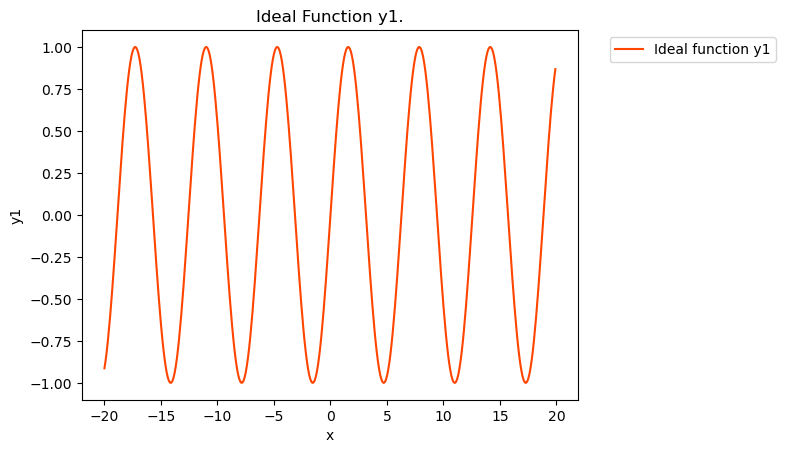

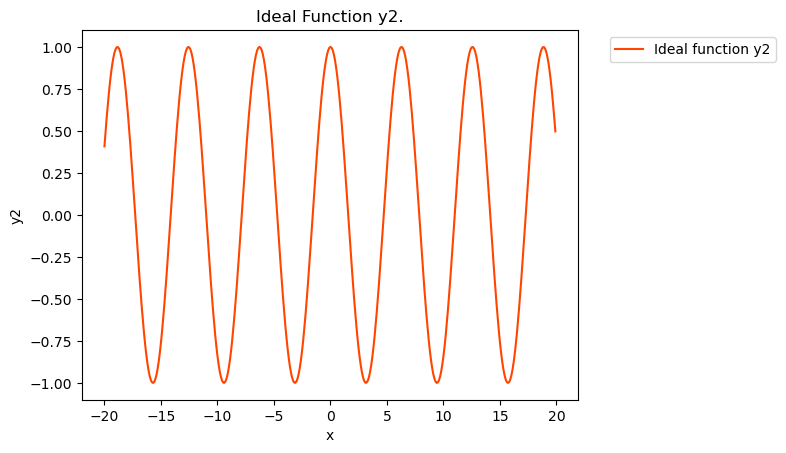

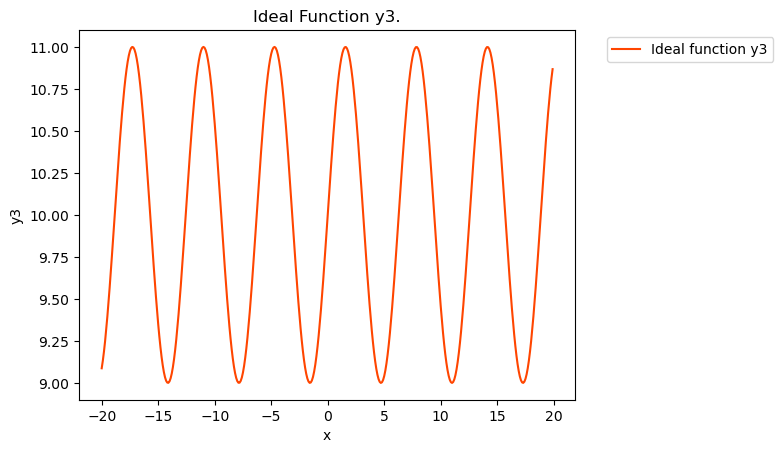

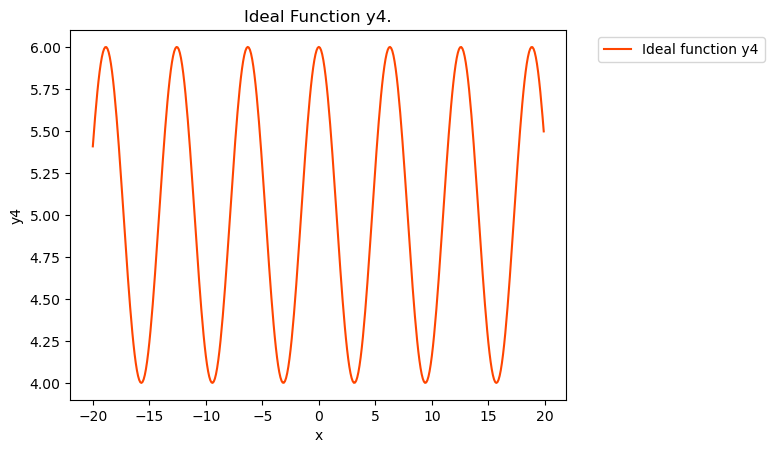

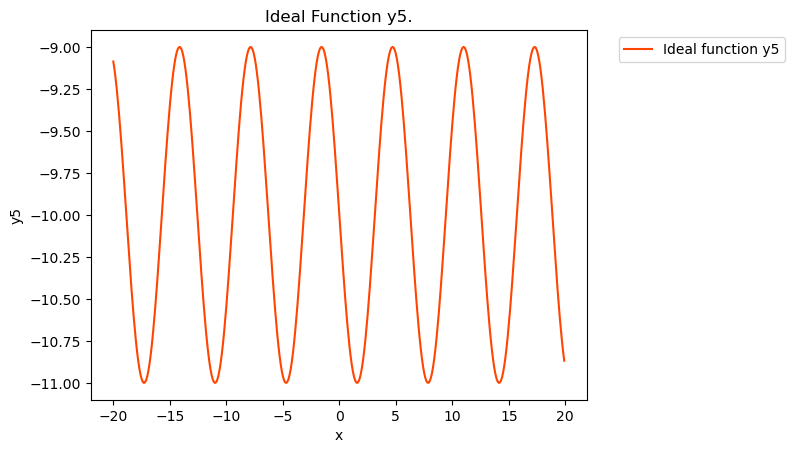

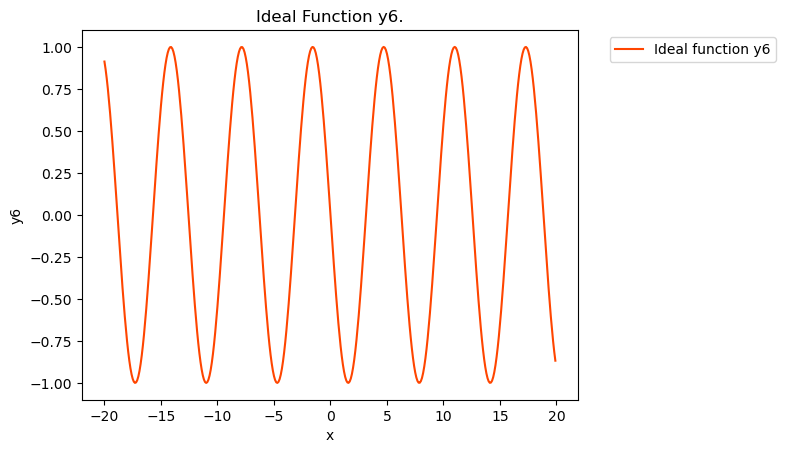

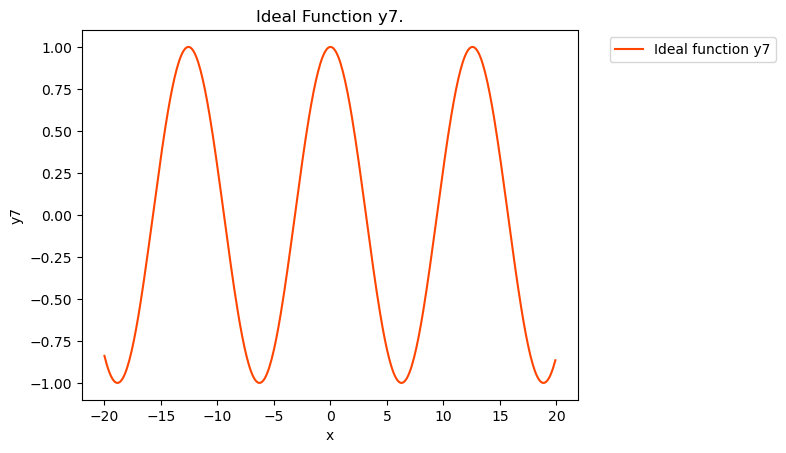

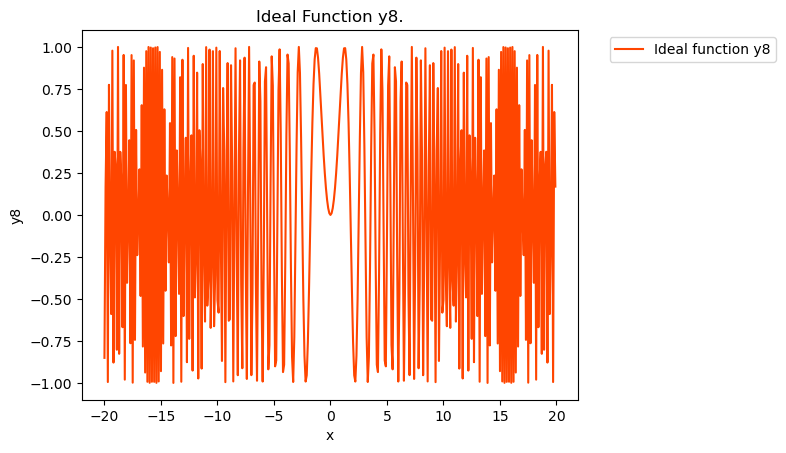

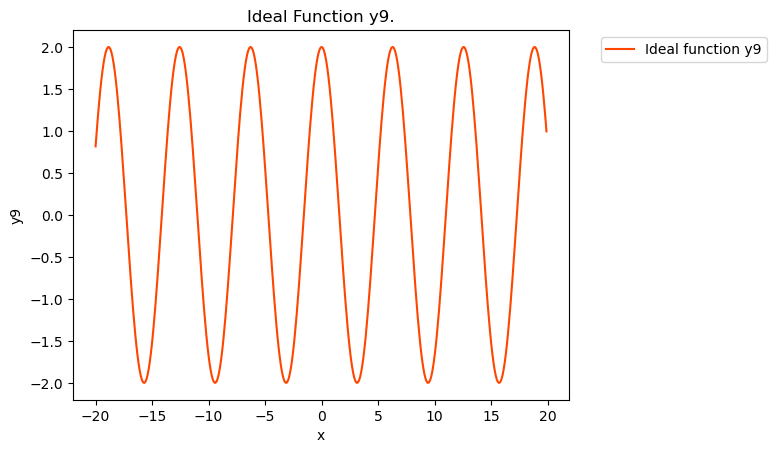

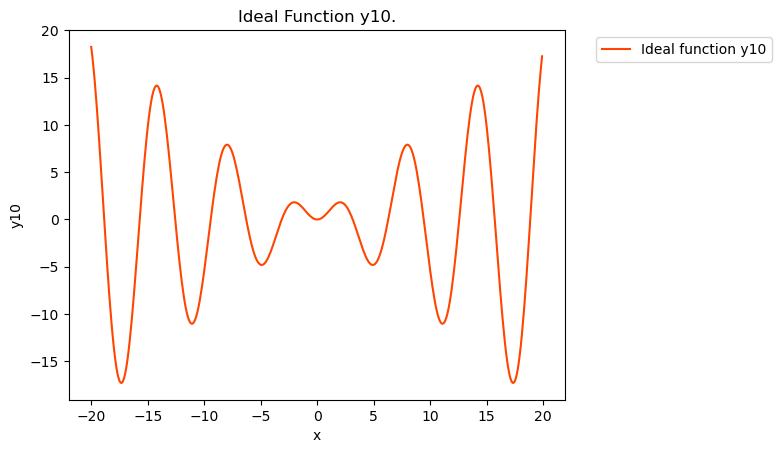

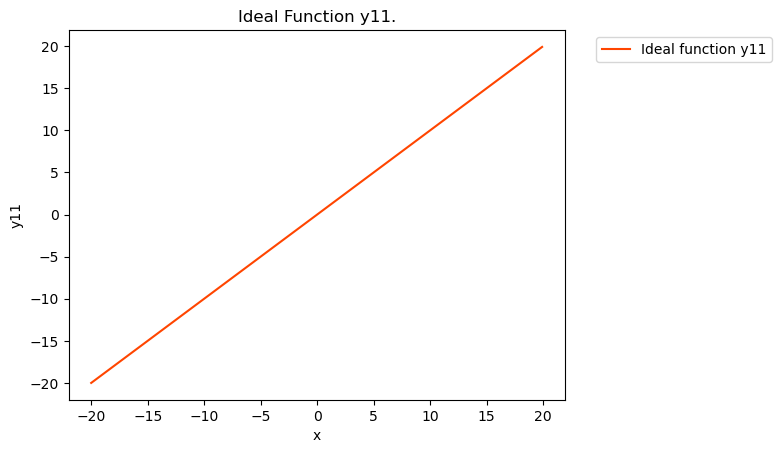

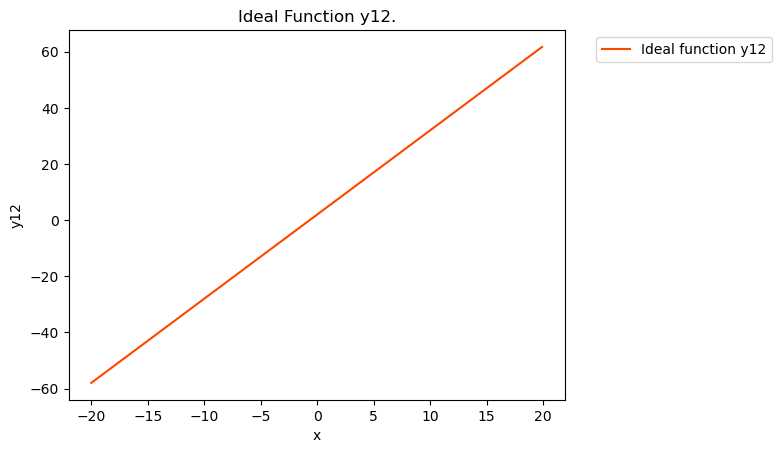

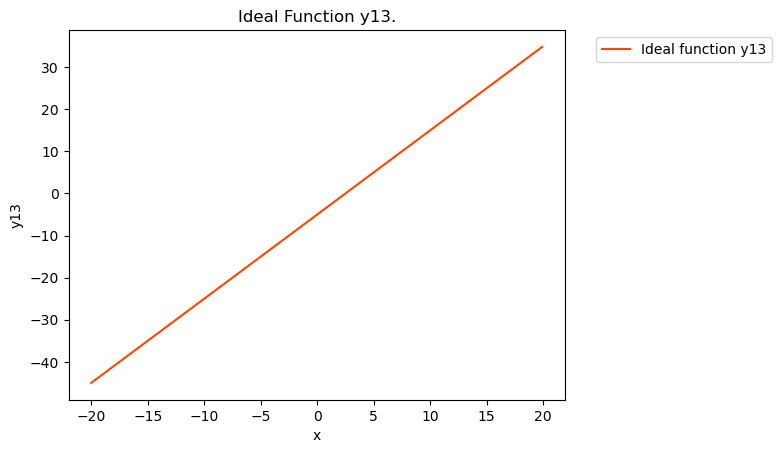

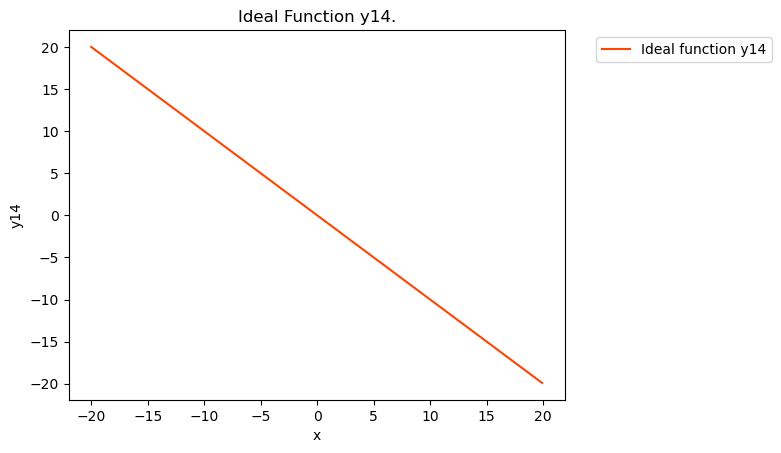

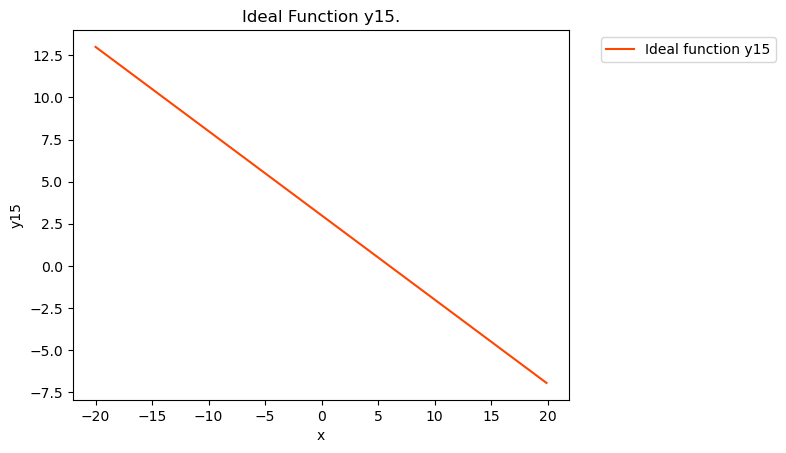

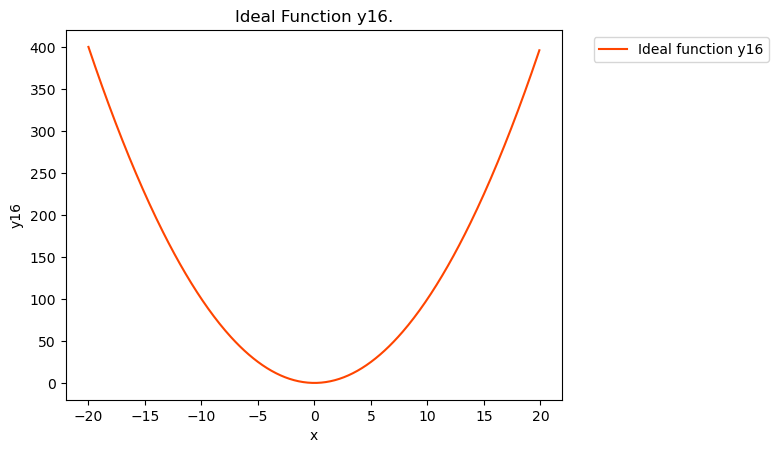

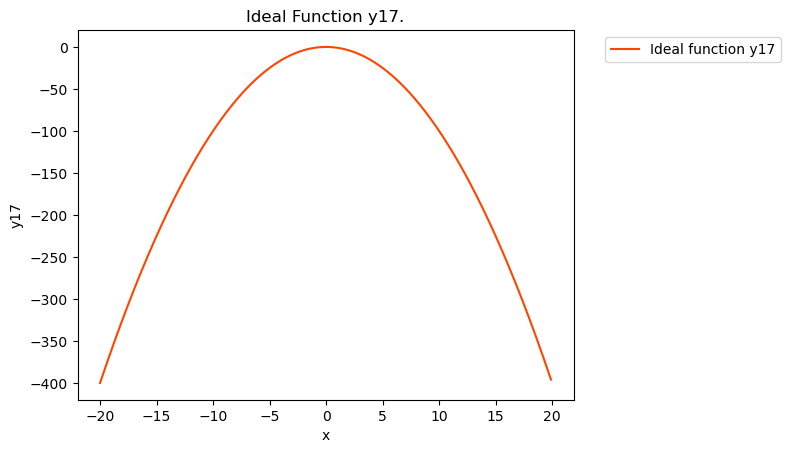

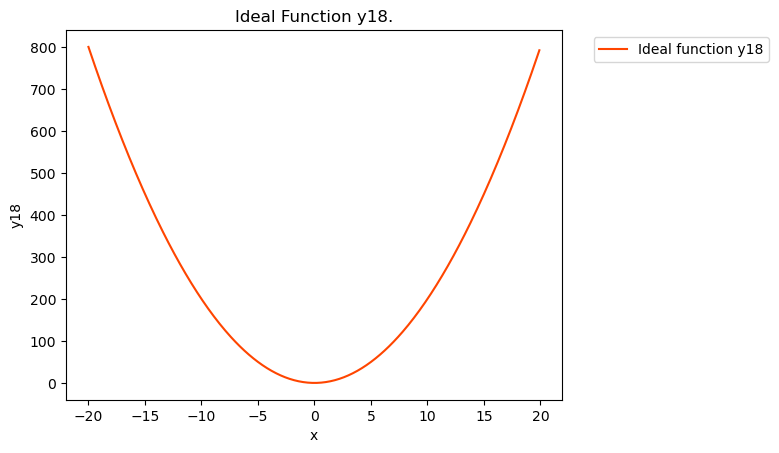

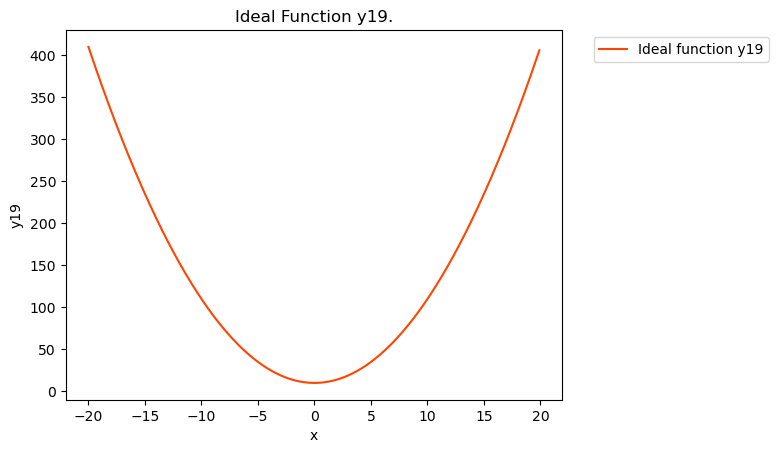

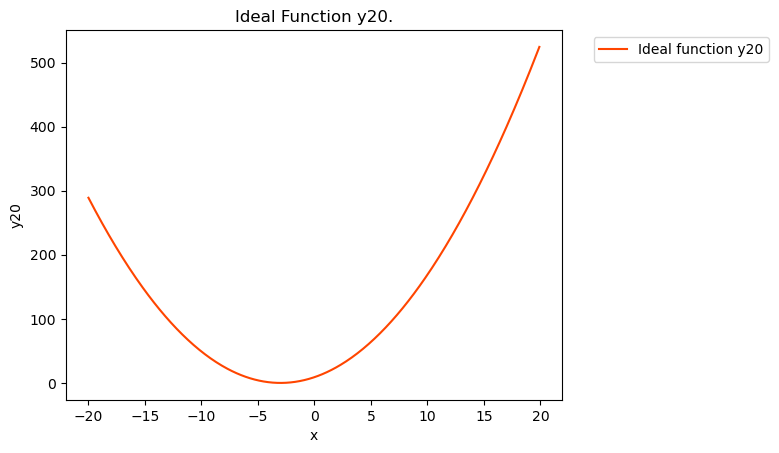

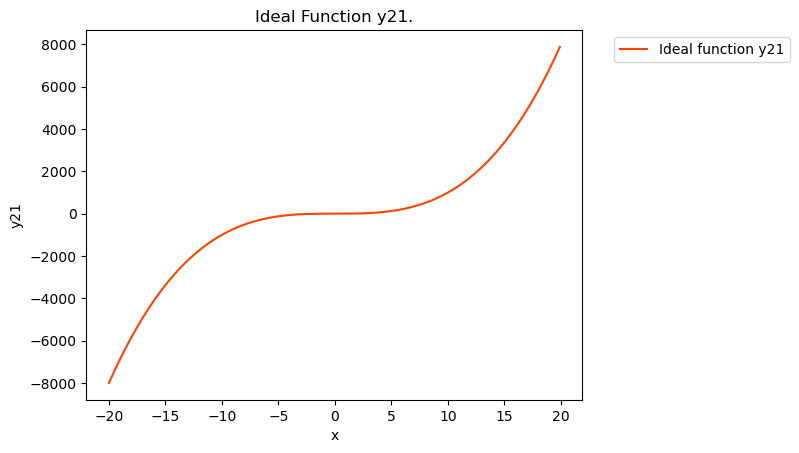

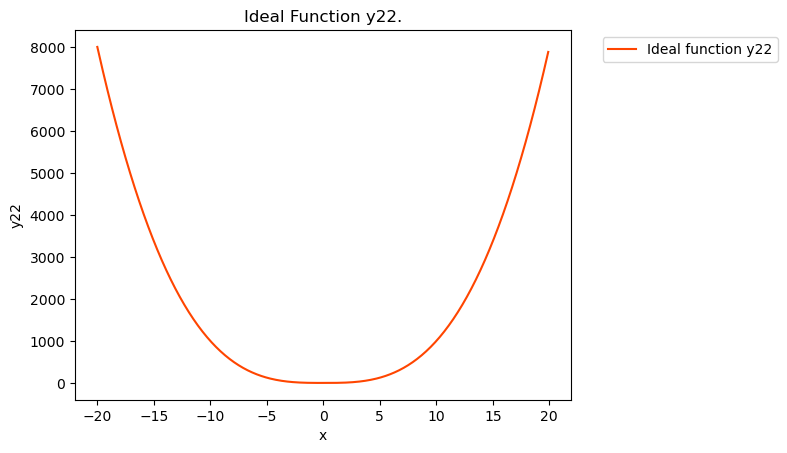

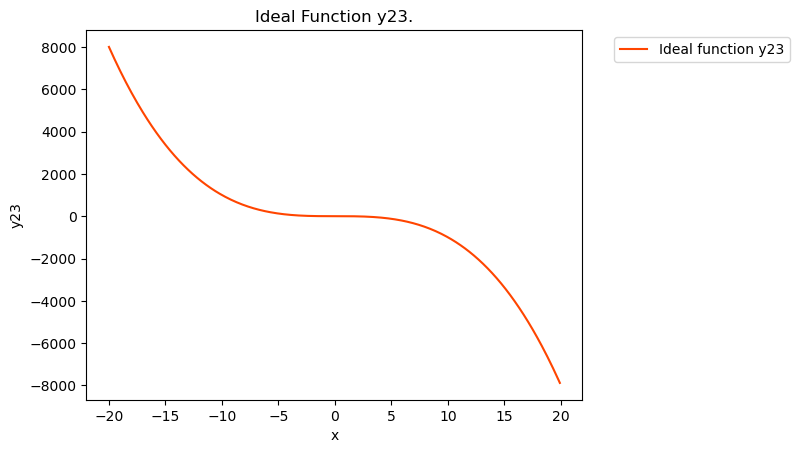

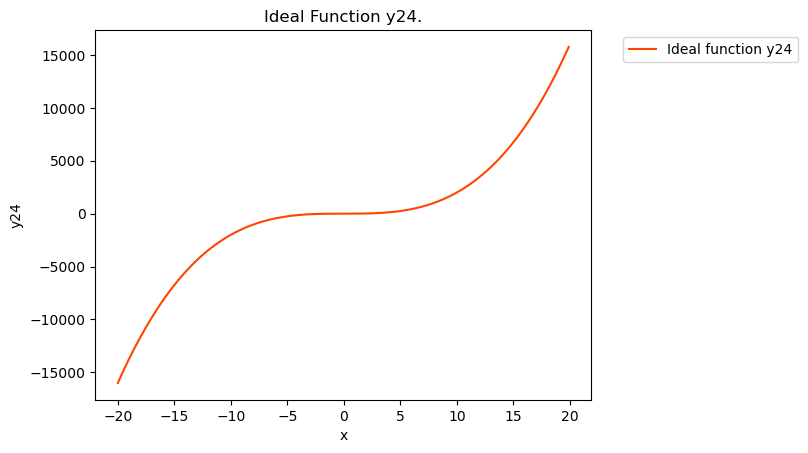

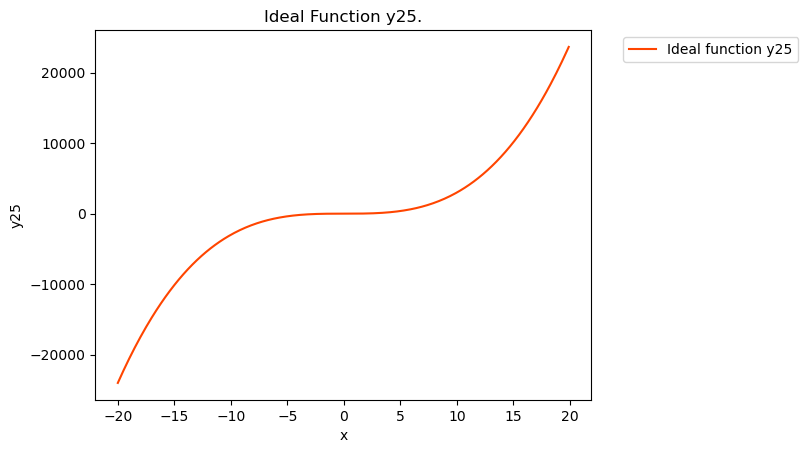

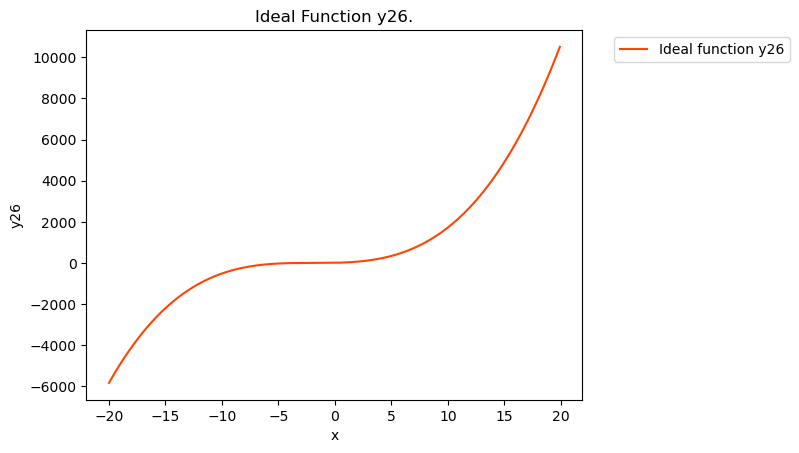

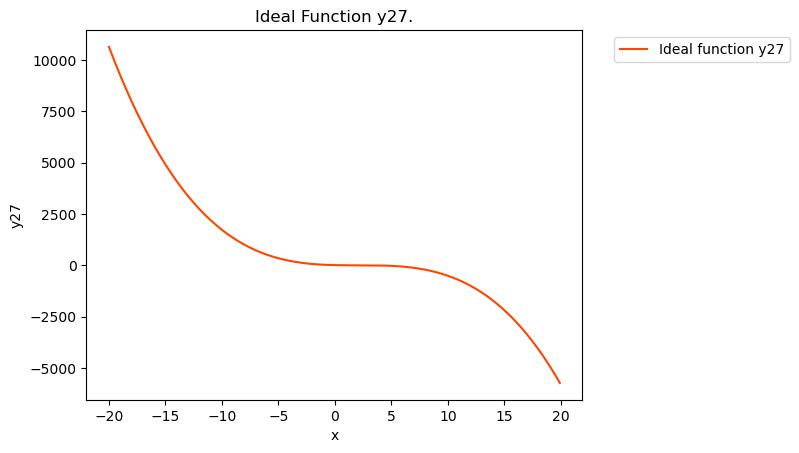

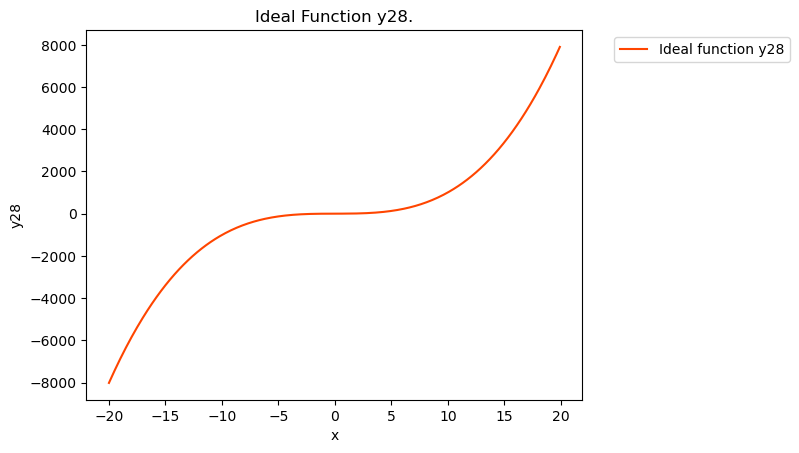

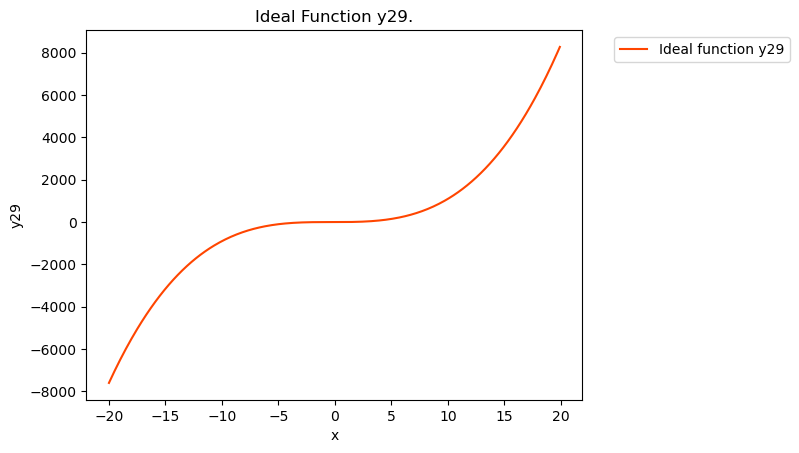

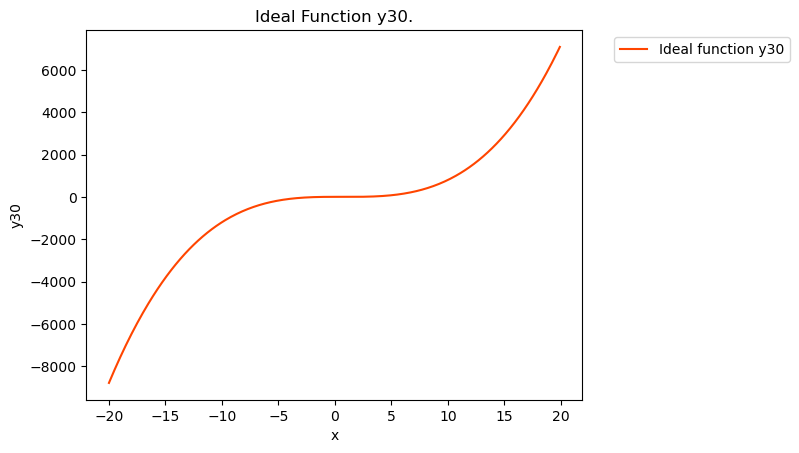

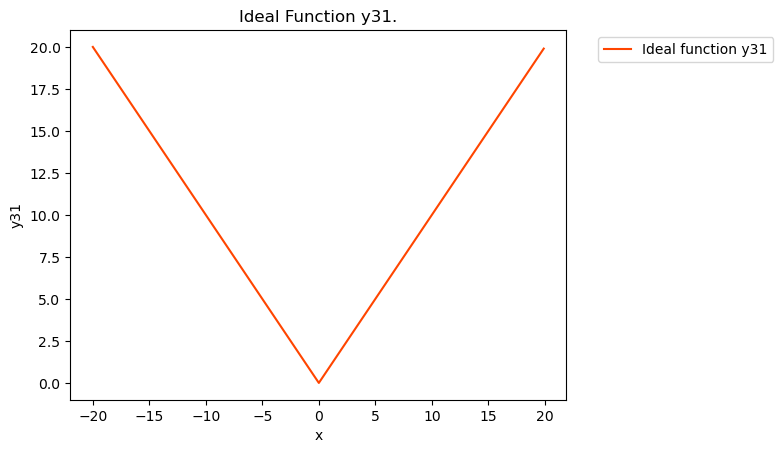

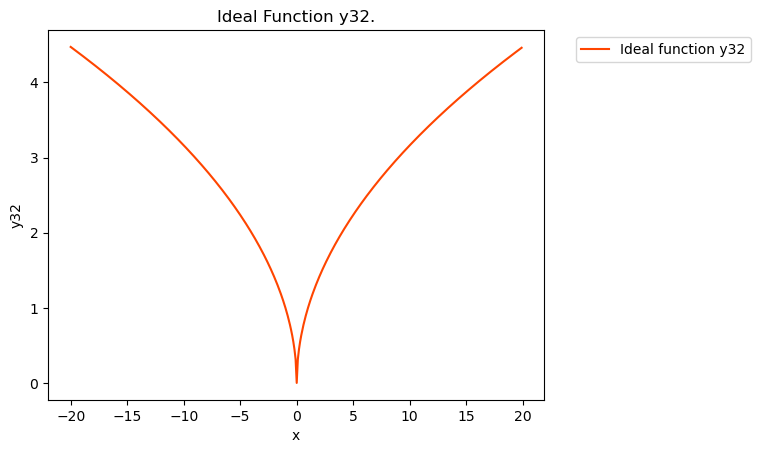

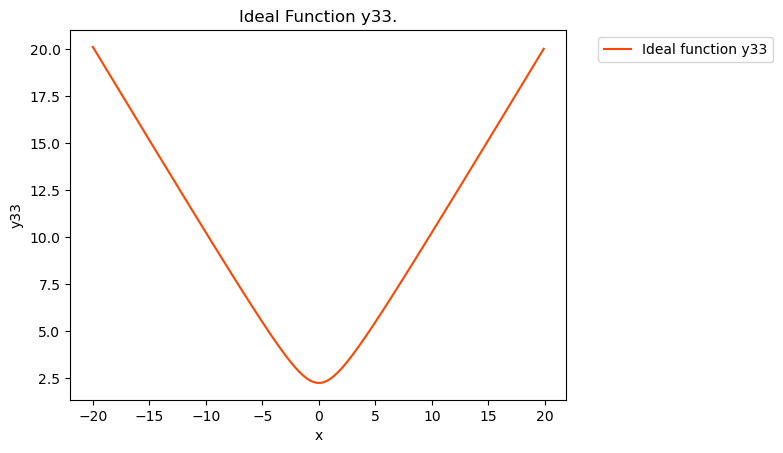

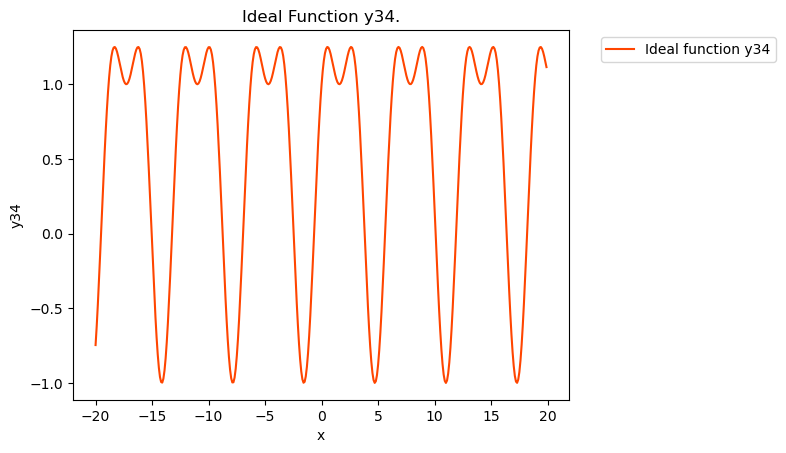

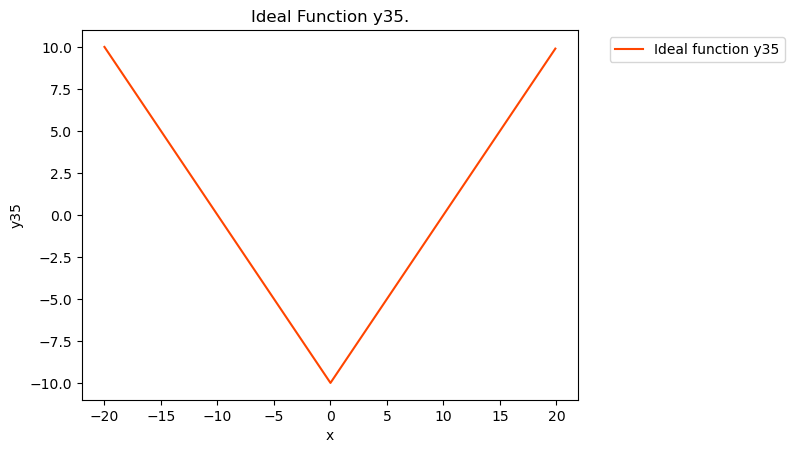

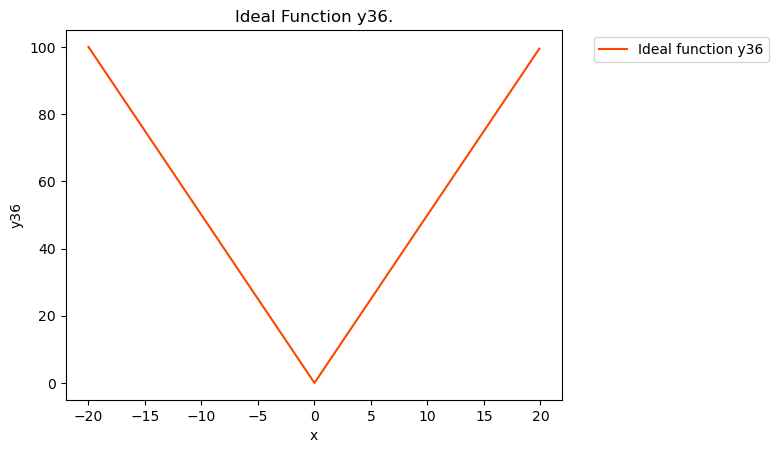

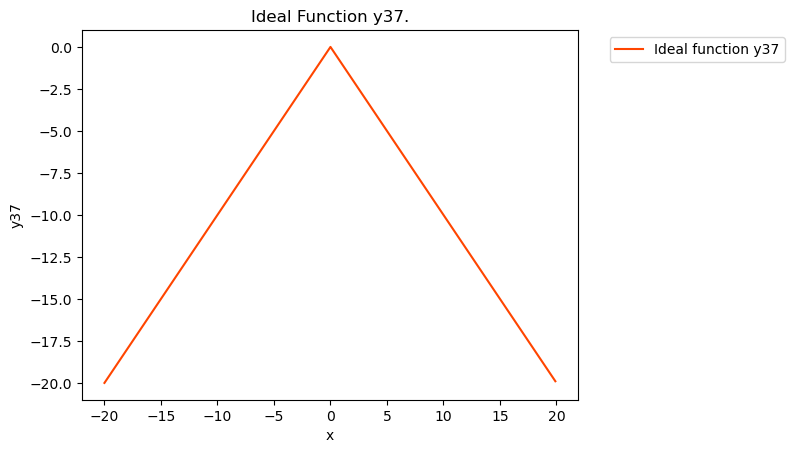

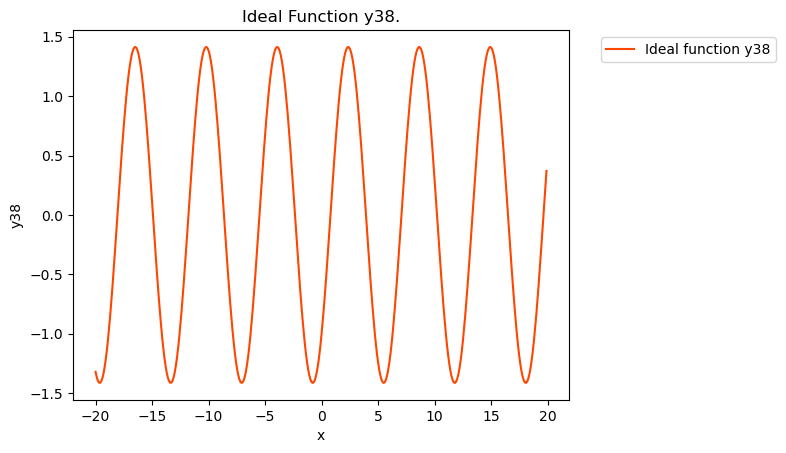

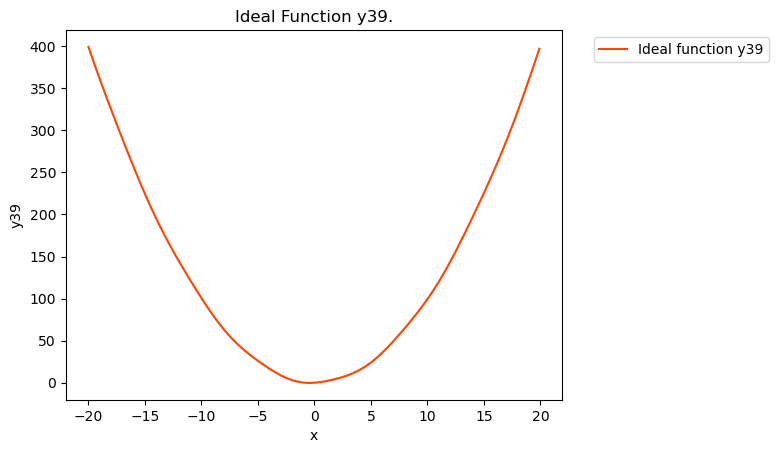

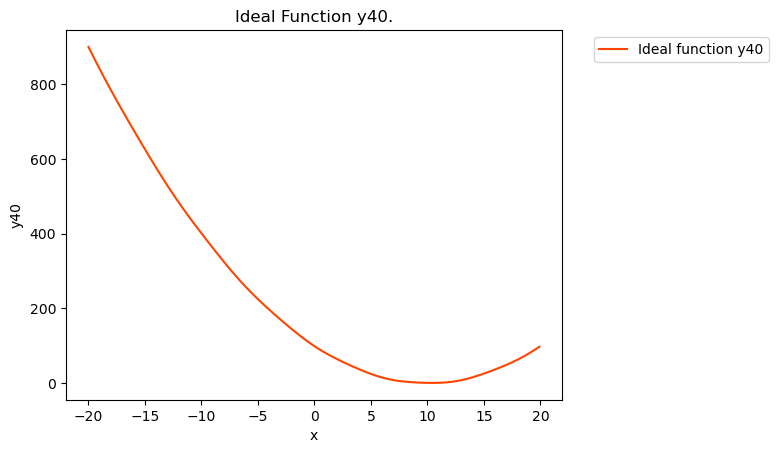

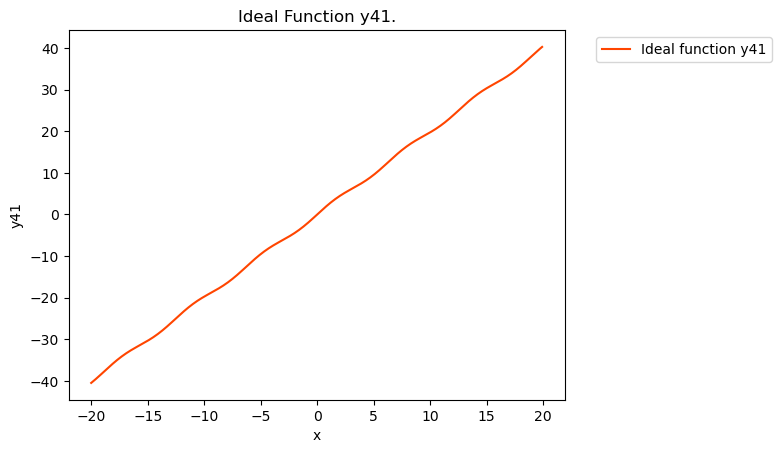

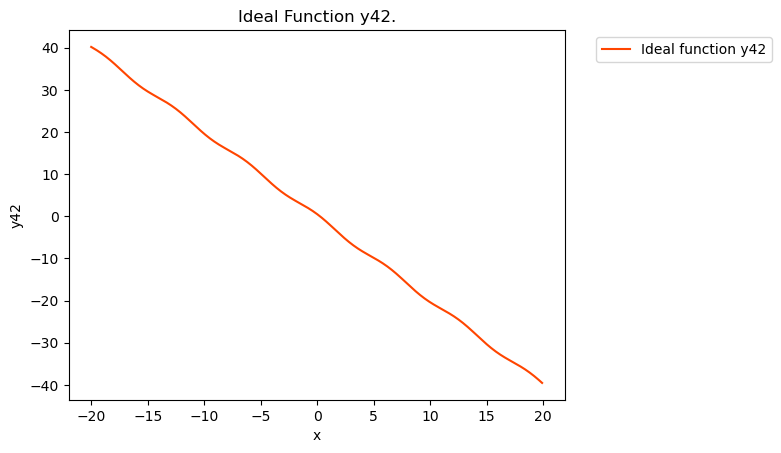

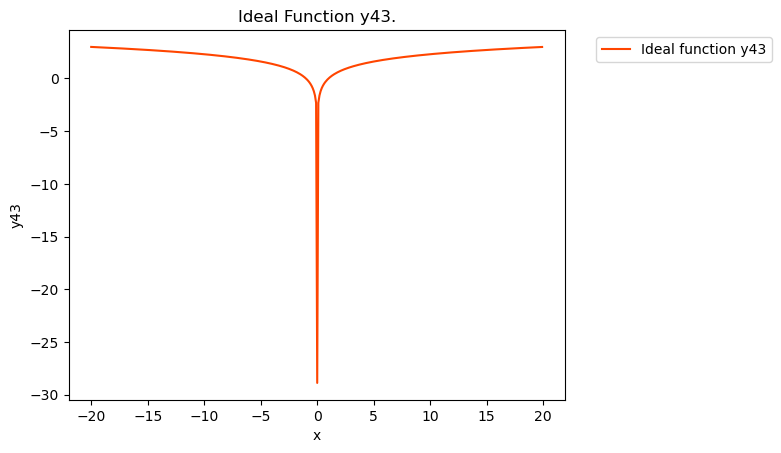

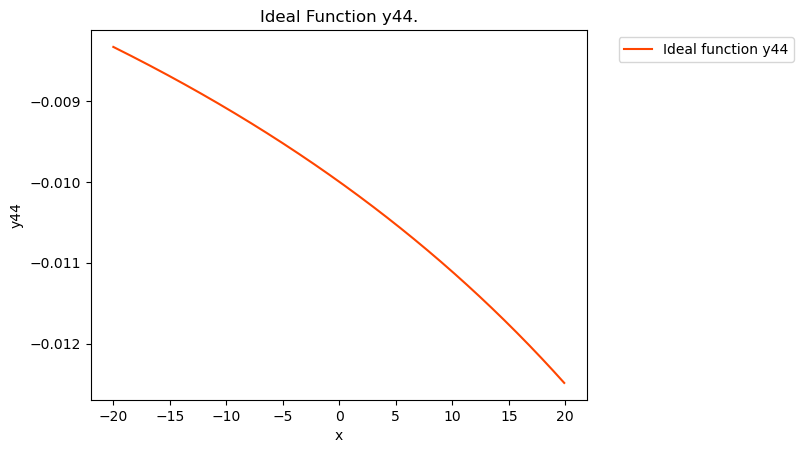

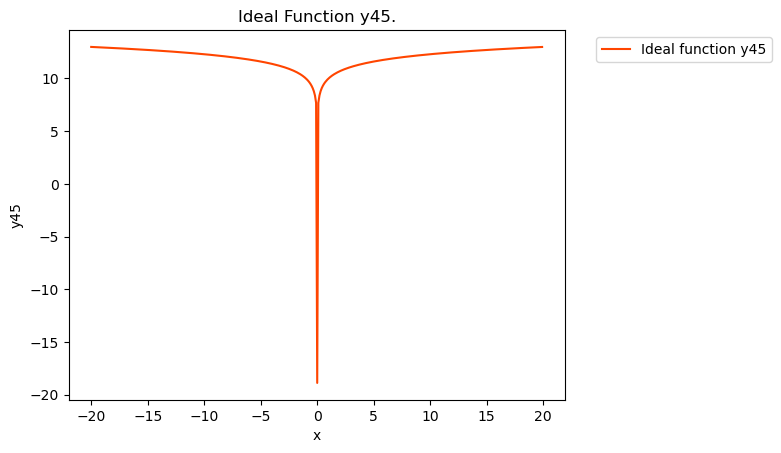

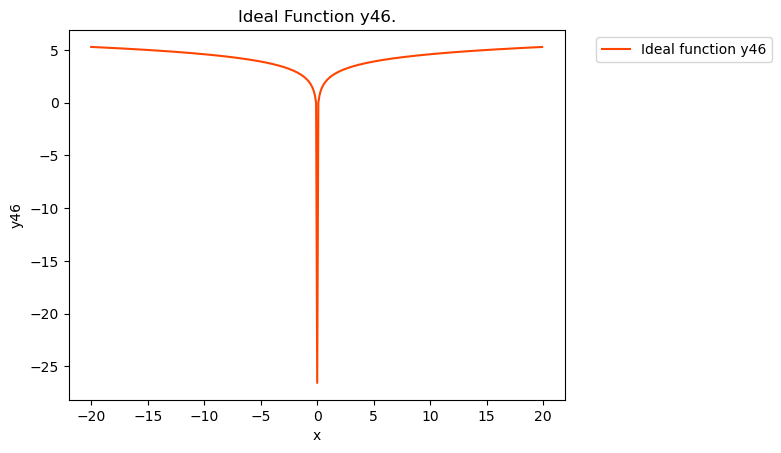

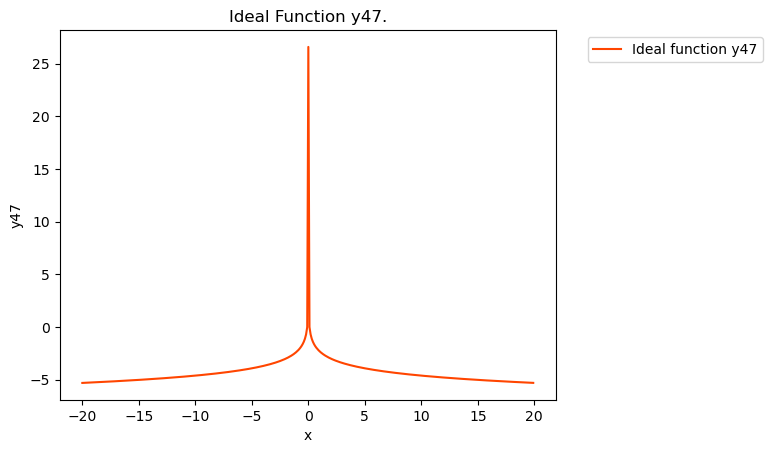

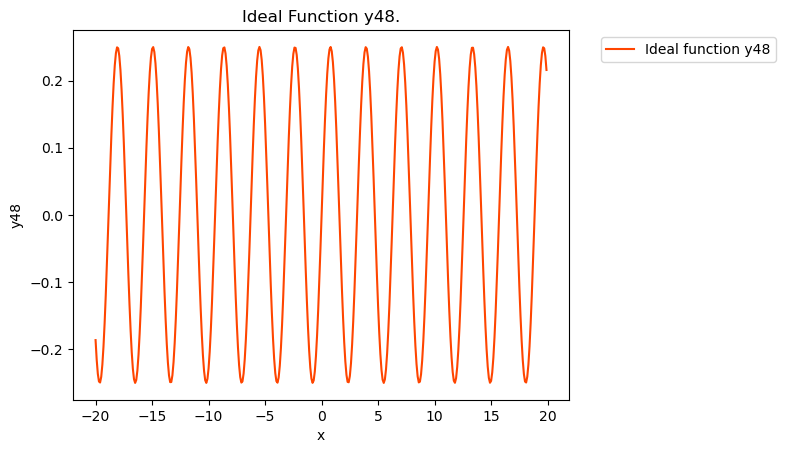

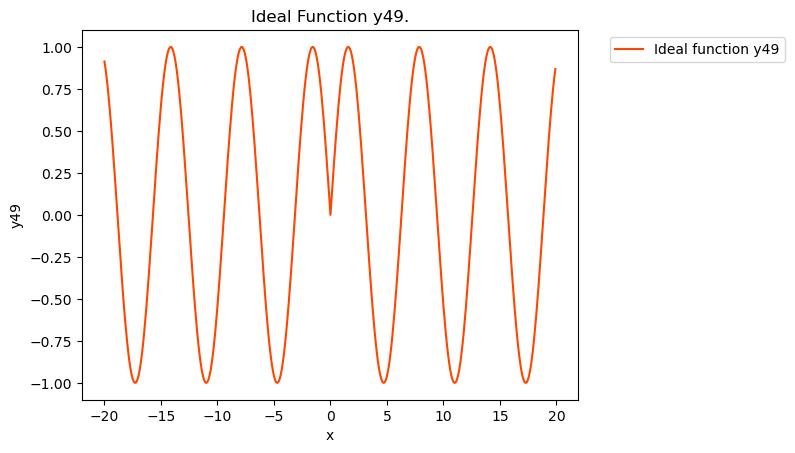

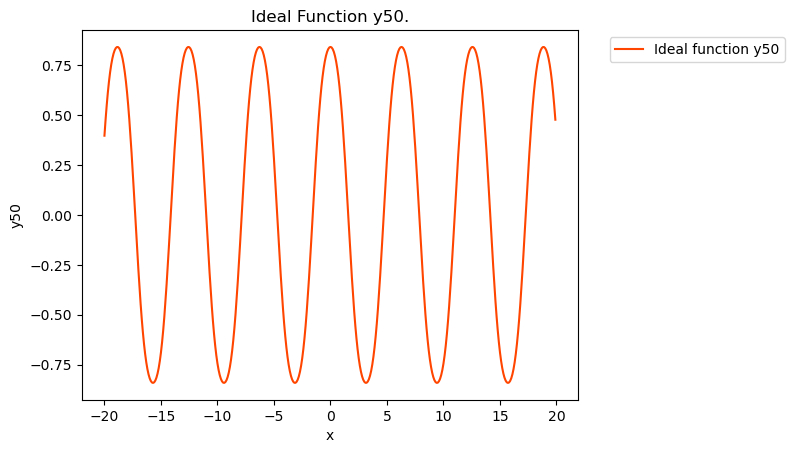

<Figure size 640x480 with 0 Axes>

In [2]:
""" 
This is a Python-program that uses training data to choose the 
four ideal functions which are the best fit out of the fifty provided (C) *. 

    i)  Afterwards, the program uses the test data provided (B) to determine 
        for each and every x-y-pair of values whether or not they can be assigned to the 
        four chosen ideal functions**; if so, the programs to executes the mapping 
        and saves it together with the deviation at hand. 

    ii) All data is visualized logically 

    iii) Where possible, suitable unit-test were compiled 

""" 

import sys     # Standard library imports 
import pandas as pd   # related third party imports 
import numpy as np 
from matplotlib import pyplot as plt 
from sqlalchemy import create_engine 


class FindFunctions: 
    def __init__(self): 
        pass 

    def find_ideal_matches(self, train_fun, ideal_fun): 

        """ 

        function finds matches between training functions and ideal functions based on min(MSE) 
        :param train_fun: define training functions 
        :param ideal_fun: define ideal functions set 
        :return: ideal functions dataframe and their deviations 
        """ 

        # find last parameters of both fucntions 
        if isinstance(train_fun, pd.DataFrame) and isinstance(ideal_fun, pd.DataFrame): 
            ideal_lcol = len(ideal_fun.columns) 
            train_lrow = train_fun.index[-1] + 1 
            train_col = len(train_fun.columns) 

            # Loop and find perfect four functions 
            index_list = []  # here 4 ideal indexes will be strored 
            least_square = []  # here 4 ideal MSEs will be stored 

            for j in range(1, train_col):  # loop through 4 train functions 
                least_square1 = [] 
                for k in range(1, ideal_lcol):  # loop through 50 ideal functions 
                    MSE_sum = 0  # Sum MSE 

                    for i in range(train_lrow):  # calculate MSE Y value of train and Y value of ideal function 
                        z1 = train_fun.iloc[i, j]  # Train y value 
                        z2 = ideal_fun.iloc[i, k]  # Ideal y value 
                        MSE_sum = MSE_sum + ((z1 - z2) ** 2) 

                    least_square1.append(MSE_sum / train_lrow) 

                min_least = min(least_square1) 
                index = least_square1.index(min_least)  # find index of the ideal function 
                index_list.append(index + 1) 
                least_square.append(min_least) 

            per_frame = pd.DataFrame(list(zip(index_list, least_square)), columns=["Index", "least_square_value"]) 

            return per_frame 

        else: 
            raise TypeError("Given arguments are not of Dataframe type.") 

    def find_ideal_via_row(self, test_fun): 

        """ 
        determine for each and every x-y-pair of values whether they can be assigned to the four chosen ideal functions 
        :param test_fun: Dataframe with x and y values 
        :return: test function paired with values from the four ideal functions 
        """ 

        if isinstance(test_fun, pd.DataFrame): 
            test_lrow = test_fun.index[-1] + 1  # last row of the test df (used for loop) 
            test_lcol = len(test_fun.columns)  # last columns of the test df (used for loop) 
            # print(test) 

            ideal_index = []  # list to store index of ideal function 
            deviation = []  # list to store Deviation 
            for j in range(test_lrow):  # loop through rows 
                MSE_l = []  # list to store all four deviations 
                
                for i in range(2, test_lcol):  # loop through columns 2, 3, 4, 5 
                    z1 = test_fun.iloc[j, 1] 
                    z2 = test_fun.iloc[j, i] 
                    MSE_sum = ((z2 - z1) ** 2)  # calculate MSE 
                    MSE_l.append(MSE_sum)  # append MSE to the MSE_l list 

                min_least = min(MSE_l)  # select min deviation in MSE_l 

                if min_least < (np.sqrt(2)): 
                    deviation.append(min_least)  # append min_least to the deviation list 
                    index = MSE_l.index(min_least)  # select index of the min_least to find ideal function 
                    ideal_index.append(index)  # append index to the ideal_index list 

                else: 

                    deviation.append(min_least) 
                    ideal_index.append("Miss")  # no criteria match 

 
            # Add two new columns to the test 
            test["Deviation"] = deviation 
            test["Ideal index"] = ideal_index 

            return test 

        else: 
            raise TypeError("Given argument is not of Dataframe type.") 

    def prepare_graphs(self, x_fun, x_par, y1_fun, y1_par, y2_fun, y2_par, show_plots=True): 

        """ 
        function prepares a plot based on given paramaters 
        :param x_fun: x function 
        :param x_par: x position 
        :param y1_fun: y1 function 
        :param y1_par: y1 position 
        :param y2_fun: y2 function 
        :param y2_par: y2 position 
        :param show_plots: True/False to display plot 
        :return: graph of x and y 
        """ 

 

        x = x_fun.iloc[:, x_par]    # x 
        y1 = y1_fun.iloc[:, y1_par]     # y1 (training function) 
        y2 = y2_fun.iloc[:, y2_par]     # y2 (ideal function) 

        # print(y1, y2) 

        plt.plot(x, y1, c="r", label="Train function")  # plot both axis 
        plt.plot(x, y2, c="b", label="Ideal function") 
        plt.xlabel("x") 
        plt.ylabel("y") 
        plt.legend(loc=3) 

        if show_plots is True: 
            plt.show()  # show current plot 
            plt.clf()   # clear plots 
        elif show_plots is False: 
            pass 
        else: 
            pass  # no paramater show_plots or wrong paramater show_plots was given 

 
print("The first part of the program executed without errors.") 

class SqliteDb(FindFunctions): 

    """ 
    Load data into Sqlite database 
    """ 

    def db_and_table_creation(self, dataframe, db_name, table_name): 

        """ 
        function creates a database from a dataframe input 
        :param dataframe: dataframe 
        :param db_name: database name 
        :param table_name: table name 
        :return: database file into the same folder as the project 
        """ 
        try: 
            engine = create_engine(f"sqlite:///{IU_Assignment}.db", echo=True)  # insert name of the DB 
            sqlite_connection = engine.connect()  # connect to the DB 
            
            for i in range(len(dataframes)):  # loop through list of dataframes 
                dataframez = dataframe[i] 
                dataframez.to_sql(table_name[i], sqlite_connection, if_exists="fail")  # load dataframe to DB 
            sqlite_connection.close()   # close connection 
            
        except Exception: 
            exception_type, exception_value, exception_traceback = sys.exc_info()  # get exception info 
            print(exception_type, exception_value, exception_traceback)     #return exception info to the user 

print("The database created successfully.") 
 
# read CSV files and load them into Dataframes 
train = pd.read_csv("train.csv") 
ideal = pd.read_csv("ideal.csv") 
test = pd.read_csv("test.csv") 

print("Read CSV files and load them into Dataframes.") 
print("") 

# Check data formats 
print("Train dataset") 
print(train) 
print("") 

print("Ideal dataset") 
print(ideal) 
print("") 

print("Test dataset") 
print(test) 
print("") 

 

# get ideal functions based on train data 
print("Get ideal functions based on train data.") 
df = FindFunctions().find_ideal_matches(train, ideal) 
print(df)  

# plot graph of all 4 pair functions together 
print("") 
print("The selected four ideal functions 11, 41, 42, and 48 are the best fit of training data ") 
print("Plot graph of all 4 pair functions together.") 

graph = FindFunctions() 
for i in range(1, len(train.columns)): 
    graph.prepare_graphs(train, 0, train, i, ideal, df.iloc[i-1, 0], False) 

# Clean test df 
test = test.sort_values(by=["x"], ascending=True)   # sort by x 
test = test.reset_index()   # reset index 
test = test.drop(columns=["index"])     # drop old index column 

print("") 
print("Clean test df") 

# Get x, y values of each of the 4 ideal functions
print("") 
print("Get x, y values of each of the 4 ideal functions.") 
ideals = []
for i in range(0, 4):
    ideals.append(ideal[["x", f"y{str(df.iloc[i, 0])}"]])

# merge test and 4 ideal functions
print("") 
print("Merge test and 4 ideal functions.") 
for i in ideals:
    test = test.merge(i, on="x", how="left")

# determine for each and every x-y-pair of values whether or not they can be assigned to the four chosen ideal functions
print("") 
print("Determine for each and every x-y-pair of values whether or not they can be assigned to the four chosen ideal functions.") 
test = FindFunctions().find_ideal_via_row(test)  
print(test)

# Replace values with ideal function names
print("") 
print("Replace values with ideal function names.")
for i in range(0, 4):
    test["Ideal index"] = test["Ideal index"].replace([i], str(f"y{df.iloc[i, 0]}"))
    
# add y values to another test_fun (used later for scatter plot)
print("") 
print("Add y values to another test_fun (used later for scatter plot).")
test_scat = test
test_scat["ideal y value"] = ""
for i in range(0, 100):
    k = test_scat.iloc[i, 7]
    if k == "y42":
        test_scat.iloc[i, 8] = test_scat.iloc[i, 2]
    elif k == "y41":
        test_scat.iloc[i, 8] = test_scat.iloc[i, 3]
    elif k == "y11":
        test_scat.iloc[i, 8] = test_scat.iloc[i, 4]
    elif k == "y48":
        test_scat.iloc[i, 8] = test_scat.iloc[i, 5]
    elif k == "Miss":
        test_scat.iloc[i, 8] = test_scat.iloc[i, 1]
print(test_scat)

# Drop other columns that are not used
print("") 
print("Drop other columns that are not used.")
test = test.drop(columns=["y42", "y41", "y11", "y48", "ideal y value"])
print(test)

# rename columns for the train table
print("") 
print("Rename columns for the train table.")
train = train.rename(columns={"y1": "Y1 (training func)", "y2": "Y2 (training func)",
                              "y3": "Y3 (training func)", "y4": "Y4 (training func)"})
print(train)

# rename columns for the ideal table
print("") 
print("Rename columns for the ideal table.")
for col in ideal.columns:       # rename columns in ideal to fit criteria
    if len(col) > 1:    # if column name is not x, therefore > 1
        ideal = ideal.rename(columns={col: f"{col} (ideal func)"})

print(ideal)
ideal_excel = 'Rename_Ideal_Columns.xlsx'
# saving to excel
ideal.to_excel(ideal_excel)
print('DataFrame is written to Excel File successfully.')

# rename columns for the test table
print("") 
print("Rename columns for the test table.")
test = test.rename(columns={"x": "X (test func)",
                            "y": "Y (test func)",
                            "Deviation": "Delta Y (test func)",
                            "Ideal index": "No. of ideal func"})
print(test)

# Load data to sqlite
#assignment_database
print("") 
print("Load data to sqlite.")
dbs = SqliteDb()
dataframes = [train, ideal, test]
table_names = ["train_table", "ideal_table", "test_table"]
dbs.db_and_table_creation(dataframes, "assignment_database", table_names)

# Visualization
# train functions
print("") 
print("Visualization.")
print("Train functions.")
plt.clf()
x = train.iloc[:, 0]
for i in range(1, len(train.columns)):
    plt.plot(x, train.iloc[:, i], c="g", label=f"Train function y{i}")
    plt.title(f"Train function y{i}.")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.xlabel("x")
    plt.ylabel(f"y{i}")
    plt.show()
    plt.clf()
    
# ideal functions (4 chosen)
print("") 
print("Ideal functions (4 chosen).")
plt.clf()
x = train.iloc[:, 0]
for i in range(0, df.index[-1] + 1):
    y = df.iloc[i, 0]  # get ideal y column number (42, 41, 11, 48)
    plt.plot(x, ideal.iloc[:, y], c="#FF4500", label=f"Ideal function y{y}")
    plt.title(f"The Chosen Ideal Function y{y}.")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.xlabel("x")
    plt.ylabel(f"y{y}")
    plt.show()
    plt.clf()

        
# test scatter (show points of test.csv)
print("") 
print("Test scatter (show points of test.csv).")
plt.clf()  # clear previous plots
plt.scatter(test.iloc[:, 0], test.iloc[:, 1])  # select x and y values
plt.title("Test scatter (show points of test.csv).")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.clf()  # clear previous plots
# create lists to visualize test_scat dataframe
print("") 
print("Create lists to visualize test_scat dataframe.")
x1 = []
x2 = []
x3 = []
x4 = []
xm = []
y1 = []
y2 = []
y3 = []
y4 = []
ym = []

# append x and y values to the upper lists
print("") 
print("Append x and y values to the upper lists.")
for i in range(0, 100):
    k = test_scat.iloc[i, 7]
    if k == "y42":
        x1.append(test_scat.iloc[i, 0])  # append x value of y42 to the x1 list
        y1.append(test_scat.iloc[i, 8])  # append y value of y42 to the y1 list
    elif k == "y41":
        x2.append(test_scat.iloc[i, 0])  # append x value of y41 to the x2 list
        y2.append(test_scat.iloc[i, 8])  # append y value of y41 to the y2 list
    elif k == "y11":
        x3.append(test_scat.iloc[i, 0])  # append x value of y11 to the x3 list
        y3.append(test_scat.iloc[i, 8])  # append y value of y11 to the y3 list
    elif k == "y48":
        x4.append(test_scat.iloc[i, 0])  # append x value of y48 to the x4 list
        y4.append(test_scat.iloc[i, 8])  # append y value of y48 to the y4 list
    elif k == "Miss":
        xm.append(test_scat.iloc[i, 0])  # append x value of "Miss" values to the xm list
        ym.append(test_scat.iloc[i, 8])  # append y value of "Miss" values to the ym list
        
# plot ideal functions and test y-values on the same scatter plot
print("") 
print("Plot ideal functions and test y-values on the same scatter plot.")
plt.scatter(x1, y1, marker="o", label="Test - y42", color="r")
plt.scatter(x2, y2, marker="s", label="Test - y41", color="b")
plt.scatter(x3, y3, marker="^", label="Test - y11", color="g")
plt.scatter(x4, y4, marker="d", label="Test - y48", color="#FFD700")
plt.scatter(xm, ym, marker="x", label="Test - Miss", color="#000000")
plt.plot(ideal.iloc[:, 0], ideal.iloc[:, 42], label="Ideal - Y42", color="#FA8072")
plt.plot(ideal.iloc[:, 0], ideal.iloc[:, 41], label="Ideal - Y41", color="#1E90FF")
plt.plot(ideal.iloc[:, 0], ideal.iloc[:, 11], label="Ideal - Y11", color="#7CFC00")
plt.plot(ideal.iloc[:, 0], ideal.iloc[:, 48], label="Ideal - Y48", color="#FFA500")
plt.title("Scatter plot of ideal functions and test y-values.")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

# ideal functions (all 50)
print("") 
print("Ideal functions (all 50).")
plt.clf()
x = ideal.iloc[:, 0]
for i in range(1, len(ideal.columns)):
    plt.plot(x, ideal.iloc[:, i], c="#FF4500", label=f"Ideal function y{i}")
    plt.title(f"Ideal Function y{i}.")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.xlabel("x")
    plt.ylabel(f"y{i}")
    plt.show()
    plt.clf()